##### Copyright 2018 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [2]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# 基本分类：对服装图像进行分类

<table class="tfo-notebook-buttons" align="left">
  <td><a target="_blank" href="https://tensorflow.google.cn/tutorials/keras/classification" class=""><img src="https://tensorflow.google.cn/images/tf_logo_32px.png" class="">在 TensorFlow.org 上查看</a></td>
  <td><a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb" class=""><img src="https://tensorflow.google.cn/images/colab_logo_32px.png" class="">在 Google Colab 中运行</a></td>
  <td><a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/zh-cn/tutorials/keras/classification.ipynb" class=""><img src="https://tensorflow.google.cn/images/GitHub-Mark-32px.png" class="">在 GitHub 上查看源代码</a></td>
  <td><a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/zh-cn/tutorials/keras/classification.ipynb" class=""><img src="https://tensorflow.google.cn/images/download_logo_32px.png" class="">下载笔记本</a></td>
</table>

本指南将训练一个神经网络模型，对运动鞋和衬衫等服装图像进行分类。即使您不理解所有细节也没关系；这只是对完整 TensorFlow 程序的快速概述，详细内容会在您实际操作的同时进行介绍。

本指南使用了 [tf.keras](https://tensorflow.google.cn/guide/keras)，它是 TensorFlow 中用来构建和训练模型的高级 API。

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


## 导入 Fashion MNIST 数据集

本指南使用 [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) 数据集，该数据集包含 10 个类别的 70,000 个灰度图像。这些图像以低分辨率（28x28 像素）展示了单件衣物，如下所示：

<table>
  <tr><td>     <img alt="Fashion MNIST sprite" src="https://tensorflow.google.cn/images/fashion-mnist-sprite.png" class=""> </td></tr>
  <tr><td align="center">     <b>图 1.</b>  <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST 样本</a>（由 Zalando 提供，MIT 许可）。<br>
</td></tr>
</table>

Fashion MNIST 旨在临时替代经典 [MNIST](http://yann.lecun.com/exdb/mnist/) 数据集，后者常被用作计算机视觉机器学习程序的“Hello, World”。MNIST 数据集包含手写数字（0、1、2 等）的图像，其格式与您将使用的衣物图像的格式相同。

本指南使用 Fashion MNIST 来实现多样化，因为它比常规 MNIST 更具挑战性。这两个数据集都相对较小，都用于验证某个算法是否按预期工作。对于代码的测试和调试，它们都是很好的起点。

在本指南中，我们使用 60,000 个图像来训练网络，使用 10,000 个图像来评估网络学习对图像分类的准确率。您可以直接从 TensorFlow 访问 Fashion MNIST。请运行以下代码，直接从 TensorFlow 中导入和加载 Fashion MNIST 数据：

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

加载数据集会返回四个 NumPy 数组：

- `train_images` 和 `train_labels` 数组是*训练集*，即模型用于学习的数据。
- *测试集*、`test_images` 和 `test_labels` 数组会被用来对模型进行测试。

图像是 28x28 的 NumPy 数组，像素值介于 0 到 255 之间。*标签*是整数数组，介于 0 到 9 之间。这些标签对应于图像所代表的服装*类*：

<table>
  <tr>
    <th>标签</th>
    <th>类</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T恤/上衣</td>
  </tr>
  <tr>
    <td>1</td>
    <td>裤子</td>
  </tr>
    <tr>
    <td>2</td>
    <td>套头衫</td>
  </tr>
    <tr>
    <td>3</td>
    <td>连衣裙</td>
  </tr>
    <tr>
    <td>4</td>
    <td>外套</td>
  </tr>
    <tr>
    <td>5</td>
    <td>凉鞋</td>
  </tr>
    <tr>
    <td>6</td>
    <td>衬衫</td>
  </tr>
    <tr>
    <td>7</td>
    <td>运动鞋</td>
  </tr>
    <tr>
    <td>8</td>
    <td>包</td>
  </tr>
    <tr>
    <td>9</td>
    <td>短靴</td>
  </tr>
</table>

每个图像都会被映射到一个标签。由于数据集不包括*类名称*，请将它们存储在下方，供稍后绘制图像时使用：

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 浏览数据

在训练模型之前，我们先浏览一下数据集的格式。以下代码显示训练集中有 60,000 个图像，每个图像由 28 x 28 的像素表示：

In [6]:
train_images.shape

(60000, 28, 28)

同样，训练集中有 60,000 个标签：

In [7]:
len(train_labels)

60000

每个标签都是一个 0 到 9 之间的整数：

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

测试集中有 10,000 个图像。同样，每个图像都由 28x28 个像素表示：

In [9]:
test_images.shape

(10000, 28, 28)

测试集包含 10,000 个图像标签：

In [10]:
len(test_labels)

10000

## 预处理数据

在训练网络之前，必须对数据进行预处理。如果您检查训练集中的第一个图像，您会看到像素值处于 0 到 255 之间：

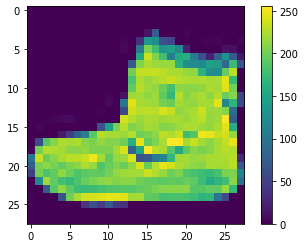

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

将这些值缩小至 0 到 1 之间，然后将其馈送到神经网络模型。为此，请将这些值除以 255。请务必以相同的方式对*训练集*和*测试集*进行预处理：

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

为了验证数据的格式是否正确，以及您是否已准备好构建和训练网络，让我们显示*训练集*中的前 25 个图像，并在每个图像下方显示类名称。

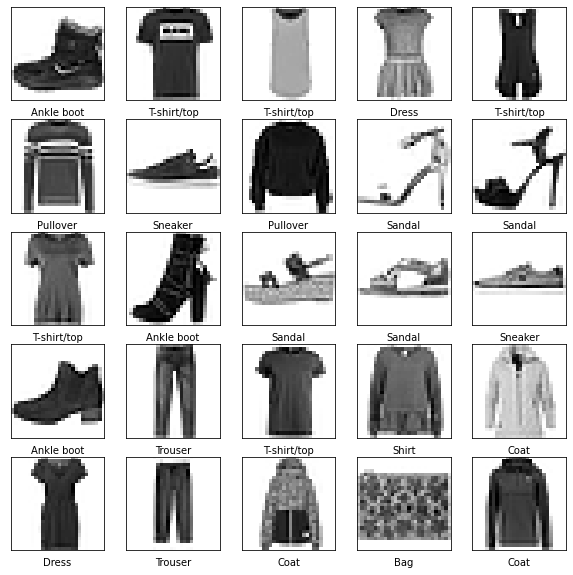

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

构建神经网络需要先配置模型的层，然后再编译模型。

### 设置层

神经网络的基本组成部分是*层*。层会从向其馈送的数据中提取表示形式。希望这些表示形式有助于解决手头上的问题。

大多数深度学习都包括将简单的层链接在一起。大多数层（如 `tf.keras.layers.Dense`）都具有在训练期间才会学习的参数。

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

该网络的第一层 `tf.keras.layers.Flatten` 将图像格式从二维数组（28 x 28 像素）转换成一维数组（28 x 28 = 784 像素）。将该层视为图像中未堆叠的像素行并将其排列起来。该层没有要学习的参数，它只会重新格式化数据。

展平像素后，网络会包括两个 `tf.keras.layers.Dense` 层的序列。它们是密集连接或全连接神经层。第一个 `Dense` 层有 128 个节点（或神经元）。第二个（也是最后一个）层会返回一个长度为 10 的 logits 数组。每个节点都包含一个得分，用来表示当前图像属于 10 个类中的哪一类。

### 编译模型

在准备对模型进行训练之前，还需要再对其进行一些设置。以下内容是在模型的*编译*步骤中添加的：

- *损失函数* - 用于测量模型在训练期间的准确率。您会希望最小化此函数，以便将模型“引导”到正确的方向上。
- *优化器* - 决定模型如何根据其看到的数据和自身的损失函数进行更新。
- *指标* - 用于监控训练和测试步骤。以下示例使用了*准确率*，即被正确分类的图像的比率。

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 训练模型

训练神经网络模型需要执行以下步骤：

1. 将训练数据馈送给模型。在本例中，训练数据位于 `train_images` 和 `train_labels` 数组中。
2. 模型学习将图像和标签关联起来。
3. 要求模型对测试集（在本例中为 `test_images` 数组）进行预测。
4. 验证预测是否与 `test_labels` 数组中的标签相匹配。


### 向模型馈送数据

要开始训练，请调用 `model.fit` 方法，这样命名是因为该方法会将模型与训练数据进行“拟合”：

In [16]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


   1/1875 [..............................] - ETA: 23:39 - loss: 2.5937 - accuracy: 0.0938

  25/1875 [..............................] - ETA: 3s - loss: 1.3750 - accuracy: 0.5400   

  50/1875 [..............................] - ETA: 3s - loss: 1.1015 - accuracy: 0.6162

  75/1875 [>.............................] - ETA: 3s - loss: 0.9878 - accuracy: 0.6558

 100/1875 [>.............................] - ETA: 3s - loss: 0.9058 - accuracy: 0.6834

 126/1875 [=>............................] - ETA: 3s - loss: 0.8515 - accuracy: 0.7068

 151/1875 [=>............................] - ETA: 3s - loss: 0.8145 - accuracy: 0.7167

 176/1875 [=>............................] - ETA: 3s - loss: 0.7802 - accuracy: 0.7276

 201/1875 [==>...........................] - ETA: 3s - loss: 0.7617 - accuracy: 0.7373

 227/1875 [==>...........................] - ETA: 3s - loss: 0.7524 - accuracy: 0.7411

 252/1875 [===>..........................] - ETA: 3s - loss: 0.7332 - accuracy: 0.7471

 278/1875 [===>..........................] - ETA: 3s - loss: 0.7185 - accuracy: 0.7518

 304/1875 [===>..........................] - ETA: 3s - loss: 0.7032 - accuracy: 0.7573

 329/1875 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.7609

 355/1875 [====>.........................] - ETA: 3s - loss: 0.6779 - accuracy: 0.7663

 381/1875 [=====>........................] - ETA: 3s - loss: 0.6654 - accuracy: 0.7705

 406/1875 [=====>........................] - ETA: 2s - loss: 0.6589 - accuracy: 0.7727

 432/1875 [=====>........................] - ETA: 2s - loss: 0.6530 - accuracy: 0.7752

 458/1875 [======>.......................] - ETA: 2s - loss: 0.6460 - accuracy: 0.7772

 484/1875 [======>.......................] - ETA: 2s - loss: 0.6397 - accuracy: 0.7798

 510/1875 [=======>......................] - ETA: 2s - loss: 0.6312 - accuracy: 0.7817

 535/1875 [=======>......................] - ETA: 2s - loss: 0.6228 - accuracy: 0.7848

 560/1875 [=======>......................] - ETA: 2s - loss: 0.6193 - accuracy: 0.7860

 586/1875 [========>.....................] - ETA: 2s - loss: 0.6122 - accuracy: 0.7881

 612/1875 [========>.....................] - ETA: 2s - loss: 0.6082 - accuracy: 0.7898

 637/1875 [=========>....................] - ETA: 2s - loss: 0.6050 - accuracy: 0.7905

 662/1875 [=========>....................] - ETA: 2s - loss: 0.6009 - accuracy: 0.7914

 686/1875 [=========>....................] - ETA: 2s - loss: 0.5964 - accuracy: 0.7925

 710/1875 [==========>...................] - ETA: 2s - loss: 0.5926 - accuracy: 0.7940

 735/1875 [==========>...................] - ETA: 2s - loss: 0.5881 - accuracy: 0.7956

 759/1875 [===========>..................] - ETA: 2s - loss: 0.5843 - accuracy: 0.7968

 783/1875 [===========>..................] - ETA: 2s - loss: 0.5823 - accuracy: 0.7977

 808/1875 [===========>..................] - ETA: 2s - loss: 0.5786 - accuracy: 0.7986

 832/1875 [============>.................] - ETA: 2s - loss: 0.5759 - accuracy: 0.7995

 856/1875 [============>.................] - ETA: 2s - loss: 0.5723 - accuracy: 0.8006

 880/1875 [=============>................] - ETA: 2s - loss: 0.5687 - accuracy: 0.8013

 904/1875 [=============>................] - ETA: 1s - loss: 0.5648 - accuracy: 0.8024

 929/1875 [=============>................] - ETA: 1s - loss: 0.5608 - accuracy: 0.8041

 953/1875 [==============>...............] - ETA: 1s - loss: 0.5582 - accuracy: 0.8051

 978/1875 [==============>...............] - ETA: 1s - loss: 0.5561 - accuracy: 0.8058

1003/1875 [===============>..............] - ETA: 1s - loss: 0.5545 - accuracy: 0.8063

1028/1875 [===============>..............] - ETA: 1s - loss: 0.5519 - accuracy: 0.8070

1053/1875 [===============>..............] - ETA: 1s - loss: 0.5495 - accuracy: 0.8077

1078/1875 [================>.............] - ETA: 1s - loss: 0.5476 - accuracy: 0.8085

1104/1875 [================>.............] - ETA: 1s - loss: 0.5454 - accuracy: 0.8092

1129/1875 [=================>............] - ETA: 1s - loss: 0.5432 - accuracy: 0.8099

1155/1875 [=================>............] - ETA: 1s - loss: 0.5400 - accuracy: 0.8111

1181/1875 [=================>............] - ETA: 1s - loss: 0.5375 - accuracy: 0.8117

1207/1875 [==================>...........] - ETA: 1s - loss: 0.5349 - accuracy: 0.8125

1233/1875 [==================>...........] - ETA: 1s - loss: 0.5333 - accuracy: 0.8129

1258/1875 [===================>..........] - ETA: 1s - loss: 0.5307 - accuracy: 0.8138

1284/1875 [===================>..........] - ETA: 1s - loss: 0.5289 - accuracy: 0.8145

1309/1875 [===================>..........] - ETA: 1s - loss: 0.5271 - accuracy: 0.8150

1335/1875 [====================>.........] - ETA: 1s - loss: 0.5249 - accuracy: 0.8157

1361/1875 [====================>.........] - ETA: 1s - loss: 0.5233 - accuracy: 0.8161

1387/1875 [=====================>........] - ETA: 0s - loss: 0.5210 - accuracy: 0.8168

1412/1875 [=====================>........] - ETA: 0s - loss: 0.5209 - accuracy: 0.8169

1438/1875 [======================>.......] - ETA: 0s - loss: 0.5202 - accuracy: 0.8170

1464/1875 [======================>.......] - ETA: 0s - loss: 0.5184 - accuracy: 0.8177

1490/1875 [======================>.......] - ETA: 0s - loss: 0.5165 - accuracy: 0.8184

1516/1875 [=======================>......] - ETA: 0s - loss: 0.5154 - accuracy: 0.8186

1542/1875 [=======================>......] - ETA: 0s - loss: 0.5138 - accuracy: 0.8193

1568/1875 [========================>.....] - ETA: 0s - loss: 0.5123 - accuracy: 0.8196

1594/1875 [========================>.....] - ETA: 0s - loss: 0.5114 - accuracy: 0.8200

1620/1875 [========================>.....] - ETA: 0s - loss: 0.5091 - accuracy: 0.8210

1646/1875 [=========================>....] - ETA: 0s - loss: 0.5075 - accuracy: 0.8215

1671/1875 [=========================>....] - ETA: 0s - loss: 0.5066 - accuracy: 0.8216

1696/1875 [==========================>...] - ETA: 0s - loss: 0.5050 - accuracy: 0.8222

1722/1875 [==========================>...] - ETA: 0s - loss: 0.5045 - accuracy: 0.8224

1747/1875 [==========================>...] - ETA: 0s - loss: 0.5029 - accuracy: 0.8229

1772/1875 [===========================>..] - ETA: 0s - loss: 0.5026 - accuracy: 0.8229

1798/1875 [===========================>..] - ETA: 0s - loss: 0.5010 - accuracy: 0.8234

1824/1875 [============================>.] - ETA: 0s - loss: 0.4993 - accuracy: 0.8239

1850/1875 [============================>.] - ETA: 0s - loss: 0.4979 - accuracy: 0.8243

1875/1875 [==============================] - 5s 2ms/step - loss: 0.4967 - accuracy: 0.8245


Epoch 2/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3493 - accuracy: 0.8438

  26/1875 [..............................] - ETA: 3s - loss: 0.4593 - accuracy: 0.8462

  52/1875 [..............................] - ETA: 3s - loss: 0.4291 - accuracy: 0.8522

  77/1875 [>.............................] - ETA: 3s - loss: 0.4091 - accuracy: 0.8592

 102/1875 [>.............................] - ETA: 3s - loss: 0.4027 - accuracy: 0.8606

 128/1875 [=>............................] - ETA: 3s - loss: 0.4017 - accuracy: 0.8635

 154/1875 [=>............................] - ETA: 3s - loss: 0.3971 - accuracy: 0.8651

 180/1875 [=>............................] - ETA: 3s - loss: 0.3981 - accuracy: 0.8655

 206/1875 [==>...........................] - ETA: 3s - loss: 0.3920 - accuracy: 0.8671

 231/1875 [==>...........................] - ETA: 3s - loss: 0.3904 - accuracy: 0.8670

 256/1875 [===>..........................] - ETA: 3s - loss: 0.3835 - accuracy: 0.8687

 282/1875 [===>..........................] - ETA: 3s - loss: 0.3830 - accuracy: 0.8691

 308/1875 [===>..........................] - ETA: 3s - loss: 0.3804 - accuracy: 0.8708

 333/1875 [====>.........................] - ETA: 3s - loss: 0.3811 - accuracy: 0.8697

 359/1875 [====>.........................] - ETA: 3s - loss: 0.3798 - accuracy: 0.8693

 385/1875 [=====>........................] - ETA: 2s - loss: 0.3800 - accuracy: 0.8687

 410/1875 [=====>........................] - ETA: 2s - loss: 0.3803 - accuracy: 0.8681

 436/1875 [=====>........................] - ETA: 2s - loss: 0.3806 - accuracy: 0.8675

 462/1875 [======>.......................] - ETA: 2s - loss: 0.3796 - accuracy: 0.8677

 488/1875 [======>.......................] - ETA: 2s - loss: 0.3801 - accuracy: 0.8674

 513/1875 [=======>......................] - ETA: 2s - loss: 0.3814 - accuracy: 0.8666

 539/1875 [=======>......................] - ETA: 2s - loss: 0.3792 - accuracy: 0.8677

 565/1875 [========>.....................] - ETA: 2s - loss: 0.3761 - accuracy: 0.8683

 590/1875 [========>.....................] - ETA: 2s - loss: 0.3761 - accuracy: 0.8685

 615/1875 [========>.....................] - ETA: 2s - loss: 0.3760 - accuracy: 0.8689

 640/1875 [=========>....................] - ETA: 2s - loss: 0.3784 - accuracy: 0.8683

 666/1875 [=========>....................] - ETA: 2s - loss: 0.3800 - accuracy: 0.8674

 692/1875 [==========>...................] - ETA: 2s - loss: 0.3799 - accuracy: 0.8672

 718/1875 [==========>...................] - ETA: 2s - loss: 0.3795 - accuracy: 0.8676

 744/1875 [==========>...................] - ETA: 2s - loss: 0.3792 - accuracy: 0.8674

 770/1875 [===========>..................] - ETA: 2s - loss: 0.3791 - accuracy: 0.8673

 796/1875 [===========>..................] - ETA: 2s - loss: 0.3796 - accuracy: 0.8671

 822/1875 [============>.................] - ETA: 2s - loss: 0.3787 - accuracy: 0.8676

 847/1875 [============>.................] - ETA: 2s - loss: 0.3791 - accuracy: 0.8677

 873/1875 [============>.................] - ETA: 1s - loss: 0.3793 - accuracy: 0.8677

 899/1875 [=============>................] - ETA: 1s - loss: 0.3806 - accuracy: 0.8675

 924/1875 [=============>................] - ETA: 1s - loss: 0.3811 - accuracy: 0.8674

 950/1875 [==============>...............] - ETA: 1s - loss: 0.3818 - accuracy: 0.8673

 975/1875 [==============>...............] - ETA: 1s - loss: 0.3806 - accuracy: 0.8675

1000/1875 [===============>..............] - ETA: 1s - loss: 0.3808 - accuracy: 0.8674

1026/1875 [===============>..............] - ETA: 1s - loss: 0.3827 - accuracy: 0.8669

1052/1875 [===============>..............] - ETA: 1s - loss: 0.3825 - accuracy: 0.8668

1077/1875 [================>.............] - ETA: 1s - loss: 0.3831 - accuracy: 0.8665

1103/1875 [================>.............] - ETA: 1s - loss: 0.3821 - accuracy: 0.8668

1129/1875 [=================>............] - ETA: 1s - loss: 0.3814 - accuracy: 0.8669

1155/1875 [=================>............] - ETA: 1s - loss: 0.3812 - accuracy: 0.8669

1181/1875 [=================>............] - ETA: 1s - loss: 0.3810 - accuracy: 0.8669

1207/1875 [==================>...........] - ETA: 1s - loss: 0.3802 - accuracy: 0.8669

1233/1875 [==================>...........] - ETA: 1s - loss: 0.3801 - accuracy: 0.8667

1258/1875 [===================>..........] - ETA: 1s - loss: 0.3805 - accuracy: 0.8664

1283/1875 [===================>..........] - ETA: 1s - loss: 0.3810 - accuracy: 0.8659

1308/1875 [===================>..........] - ETA: 1s - loss: 0.3822 - accuracy: 0.8652

1334/1875 [====================>.........] - ETA: 1s - loss: 0.3826 - accuracy: 0.8650

1359/1875 [====================>.........] - ETA: 1s - loss: 0.3823 - accuracy: 0.8650

1384/1875 [=====================>........] - ETA: 0s - loss: 0.3827 - accuracy: 0.8648

1409/1875 [=====================>........] - ETA: 0s - loss: 0.3824 - accuracy: 0.8648

1434/1875 [=====================>........] - ETA: 0s - loss: 0.3826 - accuracy: 0.8648

1459/1875 [======================>.......] - ETA: 0s - loss: 0.3824 - accuracy: 0.8648

1484/1875 [======================>.......] - ETA: 0s - loss: 0.3819 - accuracy: 0.8649

1509/1875 [=======================>......] - ETA: 0s - loss: 0.3814 - accuracy: 0.8652

1535/1875 [=======================>......] - ETA: 0s - loss: 0.3814 - accuracy: 0.8652

1560/1875 [=======================>......] - ETA: 0s - loss: 0.3811 - accuracy: 0.8651

1586/1875 [========================>.....] - ETA: 0s - loss: 0.3812 - accuracy: 0.8647

1611/1875 [========================>.....] - ETA: 0s - loss: 0.3812 - accuracy: 0.8646

1637/1875 [=========================>....] - ETA: 0s - loss: 0.3806 - accuracy: 0.8646

1663/1875 [=========================>....] - ETA: 0s - loss: 0.3803 - accuracy: 0.8646

1689/1875 [==========================>...] - ETA: 0s - loss: 0.3803 - accuracy: 0.8645

1714/1875 [==========================>...] - ETA: 0s - loss: 0.3799 - accuracy: 0.8645

1740/1875 [==========================>...] - ETA: 0s - loss: 0.3790 - accuracy: 0.8650

1766/1875 [===========================>..] - ETA: 0s - loss: 0.3786 - accuracy: 0.8649

1792/1875 [===========================>..] - ETA: 0s - loss: 0.3782 - accuracy: 0.8652

1817/1875 [============================>.] - ETA: 0s - loss: 0.3782 - accuracy: 0.8652

1842/1875 [============================>.] - ETA: 0s - loss: 0.3781 - accuracy: 0.8652

1868/1875 [============================>.] - ETA: 0s - loss: 0.3784 - accuracy: 0.8651

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8651


Epoch 3/10


   1/1875 [..............................] - ETA: 4s - loss: 0.3126 - accuracy: 0.8438

  27/1875 [..............................] - ETA: 3s - loss: 0.3489 - accuracy: 0.8692

  52/1875 [..............................] - ETA: 3s - loss: 0.3363 - accuracy: 0.8750

  78/1875 [>.............................] - ETA: 3s - loss: 0.3429 - accuracy: 0.8782

 104/1875 [>.............................] - ETA: 3s - loss: 0.3367 - accuracy: 0.8786

 130/1875 [=>............................] - ETA: 3s - loss: 0.3386 - accuracy: 0.8798

 156/1875 [=>............................] - ETA: 3s - loss: 0.3396 - accuracy: 0.8788

 182/1875 [=>............................] - ETA: 3s - loss: 0.3389 - accuracy: 0.8783

 207/1875 [==>...........................] - ETA: 3s - loss: 0.3395 - accuracy: 0.8770

 233/1875 [==>...........................] - ETA: 3s - loss: 0.3415 - accuracy: 0.8767

 259/1875 [===>..........................] - ETA: 3s - loss: 0.3384 - accuracy: 0.8773

 285/1875 [===>..........................] - ETA: 3s - loss: 0.3418 - accuracy: 0.8760

 310/1875 [===>..........................] - ETA: 3s - loss: 0.3398 - accuracy: 0.8772

 336/1875 [====>.........................] - ETA: 3s - loss: 0.3427 - accuracy: 0.8770

 361/1875 [====>.........................] - ETA: 3s - loss: 0.3431 - accuracy: 0.8770

 387/1875 [=====>........................] - ETA: 2s - loss: 0.3414 - accuracy: 0.8779

 413/1875 [=====>........................] - ETA: 2s - loss: 0.3430 - accuracy: 0.8764

 439/1875 [======>.......................] - ETA: 2s - loss: 0.3421 - accuracy: 0.8765

 464/1875 [======>.......................] - ETA: 2s - loss: 0.3418 - accuracy: 0.8765

 489/1875 [======>.......................] - ETA: 2s - loss: 0.3393 - accuracy: 0.8768

 515/1875 [=======>......................] - ETA: 2s - loss: 0.3398 - accuracy: 0.8763

 541/1875 [=======>......................] - ETA: 2s - loss: 0.3377 - accuracy: 0.8767

 567/1875 [========>.....................] - ETA: 2s - loss: 0.3383 - accuracy: 0.8765

 593/1875 [========>.....................] - ETA: 2s - loss: 0.3379 - accuracy: 0.8773

 619/1875 [========>.....................] - ETA: 2s - loss: 0.3382 - accuracy: 0.8769

 645/1875 [=========>....................] - ETA: 2s - loss: 0.3376 - accuracy: 0.8765

 671/1875 [=========>....................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8764

 697/1875 [==========>...................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8763

 723/1875 [==========>...................] - ETA: 2s - loss: 0.3379 - accuracy: 0.8764

 749/1875 [==========>...................] - ETA: 2s - loss: 0.3361 - accuracy: 0.8775

 774/1875 [===========>..................] - ETA: 2s - loss: 0.3372 - accuracy: 0.8775

 799/1875 [===========>..................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8773

 825/1875 [============>.................] - ETA: 2s - loss: 0.3382 - accuracy: 0.8772

 851/1875 [============>.................] - ETA: 2s - loss: 0.3380 - accuracy: 0.8774

 876/1875 [=============>................] - ETA: 1s - loss: 0.3386 - accuracy: 0.8769

 901/1875 [=============>................] - ETA: 1s - loss: 0.3400 - accuracy: 0.8764

 927/1875 [=============>................] - ETA: 1s - loss: 0.3404 - accuracy: 0.8765

 953/1875 [==============>...............] - ETA: 1s - loss: 0.3402 - accuracy: 0.8765

 978/1875 [==============>...............] - ETA: 1s - loss: 0.3420 - accuracy: 0.8760

1003/1875 [===============>..............] - ETA: 1s - loss: 0.3425 - accuracy: 0.8759

1029/1875 [===============>..............] - ETA: 1s - loss: 0.3424 - accuracy: 0.8760

1054/1875 [===============>..............] - ETA: 1s - loss: 0.3418 - accuracy: 0.8762

1080/1875 [================>.............] - ETA: 1s - loss: 0.3411 - accuracy: 0.8766

1105/1875 [================>.............] - ETA: 1s - loss: 0.3414 - accuracy: 0.8765

1130/1875 [=================>............] - ETA: 1s - loss: 0.3408 - accuracy: 0.8769

1156/1875 [=================>............] - ETA: 1s - loss: 0.3412 - accuracy: 0.8765

1182/1875 [=================>............] - ETA: 1s - loss: 0.3404 - accuracy: 0.8767

1208/1875 [==================>...........] - ETA: 1s - loss: 0.3394 - accuracy: 0.8771

1234/1875 [==================>...........] - ETA: 1s - loss: 0.3396 - accuracy: 0.8768

1260/1875 [===================>..........] - ETA: 1s - loss: 0.3403 - accuracy: 0.8769

1286/1875 [===================>..........] - ETA: 1s - loss: 0.3398 - accuracy: 0.8769

1311/1875 [===================>..........] - ETA: 1s - loss: 0.3398 - accuracy: 0.8770

1337/1875 [====================>.........] - ETA: 1s - loss: 0.3400 - accuracy: 0.8768

1363/1875 [====================>.........] - ETA: 1s - loss: 0.3390 - accuracy: 0.8772

1389/1875 [=====================>........] - ETA: 0s - loss: 0.3399 - accuracy: 0.8769

1415/1875 [=====================>........] - ETA: 0s - loss: 0.3397 - accuracy: 0.8773

1440/1875 [======================>.......] - ETA: 0s - loss: 0.3402 - accuracy: 0.8771

1466/1875 [======================>.......] - ETA: 0s - loss: 0.3397 - accuracy: 0.8772

1491/1875 [======================>.......] - ETA: 0s - loss: 0.3393 - accuracy: 0.8772

1517/1875 [=======================>......] - ETA: 0s - loss: 0.3386 - accuracy: 0.8773

1543/1875 [=======================>......] - ETA: 0s - loss: 0.3389 - accuracy: 0.8771

1569/1875 [========================>.....] - ETA: 0s - loss: 0.3387 - accuracy: 0.8772

1595/1875 [========================>.....] - ETA: 0s - loss: 0.3391 - accuracy: 0.8771

1620/1875 [========================>.....] - ETA: 0s - loss: 0.3383 - accuracy: 0.8774

1646/1875 [=========================>....] - ETA: 0s - loss: 0.3387 - accuracy: 0.8773

1672/1875 [=========================>....] - ETA: 0s - loss: 0.3387 - accuracy: 0.8773

1698/1875 [==========================>...] - ETA: 0s - loss: 0.3387 - accuracy: 0.8772

1723/1875 [==========================>...] - ETA: 0s - loss: 0.3378 - accuracy: 0.8774

1748/1875 [==========================>...] - ETA: 0s - loss: 0.3374 - accuracy: 0.8776

1774/1875 [===========================>..] - ETA: 0s - loss: 0.3382 - accuracy: 0.8773

1800/1875 [===========================>..] - ETA: 0s - loss: 0.3383 - accuracy: 0.8772

1826/1875 [============================>.] - ETA: 0s - loss: 0.3384 - accuracy: 0.8770

1851/1875 [============================>.] - ETA: 0s - loss: 0.3384 - accuracy: 0.8769

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3391 - accuracy: 0.8767


Epoch 4/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1489 - accuracy: 0.9688

  27/1875 [..............................] - ETA: 3s - loss: 0.2869 - accuracy: 0.8958

  53/1875 [..............................] - ETA: 3s - loss: 0.3118 - accuracy: 0.8892

  79/1875 [>.............................] - ETA: 3s - loss: 0.3096 - accuracy: 0.8896

 105/1875 [>.............................] - ETA: 3s - loss: 0.3108 - accuracy: 0.8914

 130/1875 [=>............................] - ETA: 3s - loss: 0.3110 - accuracy: 0.8906

 156/1875 [=>............................] - ETA: 3s - loss: 0.3040 - accuracy: 0.8922

 182/1875 [=>............................] - ETA: 3s - loss: 0.3094 - accuracy: 0.8884

 208/1875 [==>...........................] - ETA: 3s - loss: 0.3170 - accuracy: 0.8839

 234/1875 [==>...........................] - ETA: 3s - loss: 0.3100 - accuracy: 0.8862

 259/1875 [===>..........................] - ETA: 3s - loss: 0.3107 - accuracy: 0.8869

 285/1875 [===>..........................] - ETA: 3s - loss: 0.3114 - accuracy: 0.8861

 311/1875 [===>..........................] - ETA: 3s - loss: 0.3125 - accuracy: 0.8858

 337/1875 [====>.........................] - ETA: 3s - loss: 0.3121 - accuracy: 0.8863

 363/1875 [====>.........................] - ETA: 2s - loss: 0.3135 - accuracy: 0.8858

 389/1875 [=====>........................] - ETA: 2s - loss: 0.3133 - accuracy: 0.8858

 415/1875 [=====>........................] - ETA: 2s - loss: 0.3144 - accuracy: 0.8855

 440/1875 [======>.......................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8854

 465/1875 [======>.......................] - ETA: 2s - loss: 0.3126 - accuracy: 0.8857

 491/1875 [======>.......................] - ETA: 2s - loss: 0.3124 - accuracy: 0.8857

 516/1875 [=======>......................] - ETA: 2s - loss: 0.3124 - accuracy: 0.8855

 542/1875 [=======>......................] - ETA: 2s - loss: 0.3142 - accuracy: 0.8845

 568/1875 [========>.....................] - ETA: 2s - loss: 0.3146 - accuracy: 0.8844

 593/1875 [========>.....................] - ETA: 2s - loss: 0.3148 - accuracy: 0.8845

 618/1875 [========>.....................] - ETA: 2s - loss: 0.3142 - accuracy: 0.8849

 643/1875 [=========>....................] - ETA: 2s - loss: 0.3135 - accuracy: 0.8852

 668/1875 [=========>....................] - ETA: 2s - loss: 0.3150 - accuracy: 0.8843

 693/1875 [==========>...................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8837

 719/1875 [==========>...................] - ETA: 2s - loss: 0.3179 - accuracy: 0.8827

 745/1875 [==========>...................] - ETA: 2s - loss: 0.3171 - accuracy: 0.8833

 771/1875 [===========>..................] - ETA: 2s - loss: 0.3162 - accuracy: 0.8839

 796/1875 [===========>..................] - ETA: 2s - loss: 0.3161 - accuracy: 0.8836

 821/1875 [============>.................] - ETA: 2s - loss: 0.3170 - accuracy: 0.8834

 847/1875 [============>.................] - ETA: 2s - loss: 0.3173 - accuracy: 0.8832

 872/1875 [============>.................] - ETA: 1s - loss: 0.3166 - accuracy: 0.8835

 897/1875 [=============>................] - ETA: 1s - loss: 0.3158 - accuracy: 0.8839

 922/1875 [=============>................] - ETA: 1s - loss: 0.3166 - accuracy: 0.8835

 947/1875 [==============>...............] - ETA: 1s - loss: 0.3176 - accuracy: 0.8835

 972/1875 [==============>...............] - ETA: 1s - loss: 0.3163 - accuracy: 0.8837

 997/1875 [==============>...............] - ETA: 1s - loss: 0.3158 - accuracy: 0.8837

1022/1875 [===============>..............] - ETA: 1s - loss: 0.3164 - accuracy: 0.8836

1047/1875 [===============>..............] - ETA: 1s - loss: 0.3174 - accuracy: 0.8831

1072/1875 [================>.............] - ETA: 1s - loss: 0.3170 - accuracy: 0.8833

1098/1875 [================>.............] - ETA: 1s - loss: 0.3168 - accuracy: 0.8834

1123/1875 [================>.............] - ETA: 1s - loss: 0.3167 - accuracy: 0.8835

1148/1875 [=================>............] - ETA: 1s - loss: 0.3163 - accuracy: 0.8836

1173/1875 [=================>............] - ETA: 1s - loss: 0.3162 - accuracy: 0.8837

1198/1875 [==================>...........] - ETA: 1s - loss: 0.3156 - accuracy: 0.8841

1223/1875 [==================>...........] - ETA: 1s - loss: 0.3160 - accuracy: 0.8842

1248/1875 [==================>...........] - ETA: 1s - loss: 0.3164 - accuracy: 0.8841

1274/1875 [===================>..........] - ETA: 1s - loss: 0.3152 - accuracy: 0.8846

1300/1875 [===================>..........] - ETA: 1s - loss: 0.3149 - accuracy: 0.8848

1326/1875 [====================>.........] - ETA: 1s - loss: 0.3145 - accuracy: 0.8852

1352/1875 [====================>.........] - ETA: 1s - loss: 0.3146 - accuracy: 0.8850

1378/1875 [=====================>........] - ETA: 0s - loss: 0.3147 - accuracy: 0.8849

1404/1875 [=====================>........] - ETA: 0s - loss: 0.3144 - accuracy: 0.8849

1430/1875 [=====================>........] - ETA: 0s - loss: 0.3137 - accuracy: 0.8849

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3142 - accuracy: 0.8846

1482/1875 [======================>.......] - ETA: 0s - loss: 0.3143 - accuracy: 0.8846

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3144 - accuracy: 0.8846

1533/1875 [=======================>......] - ETA: 0s - loss: 0.3145 - accuracy: 0.8848

1558/1875 [=======================>......] - ETA: 0s - loss: 0.3139 - accuracy: 0.8849

1583/1875 [========================>.....] - ETA: 0s - loss: 0.3151 - accuracy: 0.8844

1607/1875 [========================>.....] - ETA: 0s - loss: 0.3153 - accuracy: 0.8843

1632/1875 [=========================>....] - ETA: 0s - loss: 0.3150 - accuracy: 0.8844

1657/1875 [=========================>....] - ETA: 0s - loss: 0.3147 - accuracy: 0.8845

1682/1875 [=========================>....] - ETA: 0s - loss: 0.3152 - accuracy: 0.8843

1707/1875 [==========================>...] - ETA: 0s - loss: 0.3154 - accuracy: 0.8841

1732/1875 [==========================>...] - ETA: 0s - loss: 0.3152 - accuracy: 0.8842

1757/1875 [===========================>..] - ETA: 0s - loss: 0.3153 - accuracy: 0.8840

1783/1875 [===========================>..] - ETA: 0s - loss: 0.3151 - accuracy: 0.8841

1808/1875 [===========================>..] - ETA: 0s - loss: 0.3151 - accuracy: 0.8841

1833/1875 [============================>.] - ETA: 0s - loss: 0.3152 - accuracy: 0.8843

1858/1875 [============================>.] - ETA: 0s - loss: 0.3153 - accuracy: 0.8842

1875/1875 [==============================] - 4s 2ms/step - loss: 0.3148 - accuracy: 0.8843


Epoch 5/10


   1/1875 [..............................] - ETA: 6s - loss: 0.2868 - accuracy: 0.8750

  26/1875 [..............................] - ETA: 3s - loss: 0.3002 - accuracy: 0.8882

  51/1875 [..............................] - ETA: 3s - loss: 0.2761 - accuracy: 0.8928

  76/1875 [>.............................] - ETA: 3s - loss: 0.2845 - accuracy: 0.8877

 101/1875 [>.............................] - ETA: 3s - loss: 0.2866 - accuracy: 0.8905

 126/1875 [=>............................] - ETA: 3s - loss: 0.2849 - accuracy: 0.8914

 151/1875 [=>............................] - ETA: 3s - loss: 0.2944 - accuracy: 0.8870

 176/1875 [=>............................] - ETA: 3s - loss: 0.3007 - accuracy: 0.8860

 201/1875 [==>...........................] - ETA: 3s - loss: 0.3032 - accuracy: 0.8853

 226/1875 [==>...........................] - ETA: 3s - loss: 0.3029 - accuracy: 0.8855

 251/1875 [===>..........................] - ETA: 3s - loss: 0.3053 - accuracy: 0.8853

 276/1875 [===>..........................] - ETA: 3s - loss: 0.3014 - accuracy: 0.8878

 301/1875 [===>..........................] - ETA: 3s - loss: 0.3018 - accuracy: 0.8879

 327/1875 [====>.........................] - ETA: 3s - loss: 0.2973 - accuracy: 0.8904

 352/1875 [====>.........................] - ETA: 3s - loss: 0.2947 - accuracy: 0.8910

 378/1875 [=====>........................] - ETA: 3s - loss: 0.2965 - accuracy: 0.8904

 403/1875 [=====>........................] - ETA: 2s - loss: 0.2976 - accuracy: 0.8909

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2975 - accuracy: 0.8907

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2968 - accuracy: 0.8910

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2993 - accuracy: 0.8901

 504/1875 [=======>......................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8897

 530/1875 [=======>......................] - ETA: 2s - loss: 0.3009 - accuracy: 0.8895

 555/1875 [=======>......................] - ETA: 2s - loss: 0.3024 - accuracy: 0.8882

 580/1875 [========>.....................] - ETA: 2s - loss: 0.3027 - accuracy: 0.8883

 605/1875 [========>.....................] - ETA: 2s - loss: 0.3031 - accuracy: 0.8876

 630/1875 [=========>....................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8880

 655/1875 [=========>....................] - ETA: 2s - loss: 0.3028 - accuracy: 0.8883

 680/1875 [=========>....................] - ETA: 2s - loss: 0.3022 - accuracy: 0.8889

 705/1875 [==========>...................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8893

 730/1875 [==========>...................] - ETA: 2s - loss: 0.3033 - accuracy: 0.8878

 755/1875 [===========>..................] - ETA: 2s - loss: 0.3025 - accuracy: 0.8877

 779/1875 [===========>..................] - ETA: 2s - loss: 0.3015 - accuracy: 0.8886

 805/1875 [===========>..................] - ETA: 2s - loss: 0.3011 - accuracy: 0.8885

 830/1875 [============>.................] - ETA: 2s - loss: 0.2998 - accuracy: 0.8889

 855/1875 [============>.................] - ETA: 2s - loss: 0.2999 - accuracy: 0.8886

 880/1875 [=============>................] - ETA: 2s - loss: 0.3007 - accuracy: 0.8885

 905/1875 [=============>................] - ETA: 1s - loss: 0.3006 - accuracy: 0.8885

 930/1875 [=============>................] - ETA: 1s - loss: 0.3009 - accuracy: 0.8887

 955/1875 [==============>...............] - ETA: 1s - loss: 0.3007 - accuracy: 0.8889

 980/1875 [==============>...............] - ETA: 1s - loss: 0.2999 - accuracy: 0.8892

1005/1875 [===============>..............] - ETA: 1s - loss: 0.2990 - accuracy: 0.8893

1030/1875 [===============>..............] - ETA: 1s - loss: 0.2991 - accuracy: 0.8892

1055/1875 [===============>..............] - ETA: 1s - loss: 0.2984 - accuracy: 0.8895

1080/1875 [================>.............] - ETA: 1s - loss: 0.2977 - accuracy: 0.8897

1105/1875 [================>.............] - ETA: 1s - loss: 0.2985 - accuracy: 0.8898

1130/1875 [=================>............] - ETA: 1s - loss: 0.2992 - accuracy: 0.8897

1156/1875 [=================>............] - ETA: 1s - loss: 0.2990 - accuracy: 0.8898

1181/1875 [=================>............] - ETA: 1s - loss: 0.3000 - accuracy: 0.8894

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2999 - accuracy: 0.8894

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2998 - accuracy: 0.8894

1255/1875 [===================>..........] - ETA: 1s - loss: 0.2997 - accuracy: 0.8895

1280/1875 [===================>..........] - ETA: 1s - loss: 0.3003 - accuracy: 0.8893

1305/1875 [===================>..........] - ETA: 1s - loss: 0.3005 - accuracy: 0.8892

1330/1875 [====================>.........] - ETA: 1s - loss: 0.3002 - accuracy: 0.8894

1355/1875 [====================>.........] - ETA: 1s - loss: 0.3007 - accuracy: 0.8892

1381/1875 [=====================>........] - ETA: 1s - loss: 0.3014 - accuracy: 0.8891

1406/1875 [=====================>........] - ETA: 0s - loss: 0.3015 - accuracy: 0.8894

1431/1875 [=====================>........] - ETA: 0s - loss: 0.3014 - accuracy: 0.8894

1456/1875 [======================>.......] - ETA: 0s - loss: 0.3018 - accuracy: 0.8893

1482/1875 [======================>.......] - ETA: 0s - loss: 0.3017 - accuracy: 0.8894

1507/1875 [=======================>......] - ETA: 0s - loss: 0.3013 - accuracy: 0.8895

1532/1875 [=======================>......] - ETA: 0s - loss: 0.3016 - accuracy: 0.8894

1557/1875 [=======================>......] - ETA: 0s - loss: 0.3014 - accuracy: 0.8895

1582/1875 [========================>.....] - ETA: 0s - loss: 0.3009 - accuracy: 0.8896

1608/1875 [========================>.....] - ETA: 0s - loss: 0.3009 - accuracy: 0.8897

1633/1875 [=========================>....] - ETA: 0s - loss: 0.3001 - accuracy: 0.8900

1658/1875 [=========================>....] - ETA: 0s - loss: 0.2996 - accuracy: 0.8902

1683/1875 [=========================>....] - ETA: 0s - loss: 0.2993 - accuracy: 0.8903

1709/1875 [==========================>...] - ETA: 0s - loss: 0.2989 - accuracy: 0.8905

1734/1875 [==========================>...] - ETA: 0s - loss: 0.2980 - accuracy: 0.8909

1759/1875 [===========================>..] - ETA: 0s - loss: 0.2979 - accuracy: 0.8909

1784/1875 [===========================>..] - ETA: 0s - loss: 0.2983 - accuracy: 0.8907

1809/1875 [===========================>..] - ETA: 0s - loss: 0.2978 - accuracy: 0.8909

1835/1875 [============================>.] - ETA: 0s - loss: 0.2982 - accuracy: 0.8909

1861/1875 [============================>.] - ETA: 0s - loss: 0.2979 - accuracy: 0.8910

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2984 - accuracy: 0.8908


Epoch 6/10


   1/1875 [..............................] - ETA: 6s - loss: 0.3059 - accuracy: 0.8438

  26/1875 [..............................] - ETA: 3s - loss: 0.2667 - accuracy: 0.8978

  51/1875 [..............................] - ETA: 3s - loss: 0.2762 - accuracy: 0.8909

  76/1875 [>.............................] - ETA: 3s - loss: 0.2762 - accuracy: 0.8914

 101/1875 [>.............................] - ETA: 3s - loss: 0.2766 - accuracy: 0.8929

 126/1875 [=>............................] - ETA: 3s - loss: 0.2706 - accuracy: 0.8988

 151/1875 [=>............................] - ETA: 3s - loss: 0.2724 - accuracy: 0.8971

 176/1875 [=>............................] - ETA: 3s - loss: 0.2705 - accuracy: 0.8986

 202/1875 [==>...........................] - ETA: 3s - loss: 0.2684 - accuracy: 0.8996

 227/1875 [==>...........................] - ETA: 3s - loss: 0.2705 - accuracy: 0.8992

 252/1875 [===>..........................] - ETA: 3s - loss: 0.2666 - accuracy: 0.8993

 277/1875 [===>..........................] - ETA: 3s - loss: 0.2687 - accuracy: 0.8988

 302/1875 [===>..........................] - ETA: 3s - loss: 0.2657 - accuracy: 0.9000

 327/1875 [====>.........................] - ETA: 3s - loss: 0.2654 - accuracy: 0.9008

 352/1875 [====>.........................] - ETA: 3s - loss: 0.2705 - accuracy: 0.8991

 377/1875 [=====>........................] - ETA: 3s - loss: 0.2737 - accuracy: 0.8977

 402/1875 [=====>........................] - ETA: 2s - loss: 0.2775 - accuracy: 0.8968

 427/1875 [=====>........................] - ETA: 2s - loss: 0.2767 - accuracy: 0.8975

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2754 - accuracy: 0.8984

 475/1875 [======>.......................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8980

 500/1875 [=======>......................] - ETA: 2s - loss: 0.2782 - accuracy: 0.8972

 525/1875 [=======>......................] - ETA: 2s - loss: 0.2763 - accuracy: 0.8974

 551/1875 [=======>......................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8969

 576/1875 [========>.....................] - ETA: 2s - loss: 0.2771 - accuracy: 0.8965

 602/1875 [========>.....................] - ETA: 2s - loss: 0.2772 - accuracy: 0.8962

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2781 - accuracy: 0.8958

 653/1875 [=========>....................] - ETA: 2s - loss: 0.2800 - accuracy: 0.8952

 678/1875 [=========>....................] - ETA: 2s - loss: 0.2809 - accuracy: 0.8949

 703/1875 [==========>...................] - ETA: 2s - loss: 0.2813 - accuracy: 0.8949

 728/1875 [==========>...................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8947

 753/1875 [===========>..................] - ETA: 2s - loss: 0.2812 - accuracy: 0.8949

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2815 - accuracy: 0.8951

 804/1875 [===========>..................] - ETA: 2s - loss: 0.2824 - accuracy: 0.8951

 829/1875 [============>.................] - ETA: 2s - loss: 0.2834 - accuracy: 0.8949

 854/1875 [============>.................] - ETA: 2s - loss: 0.2835 - accuracy: 0.8947

 879/1875 [=============>................] - ETA: 2s - loss: 0.2839 - accuracy: 0.8950

 904/1875 [=============>................] - ETA: 1s - loss: 0.2834 - accuracy: 0.8950

 929/1875 [=============>................] - ETA: 1s - loss: 0.2834 - accuracy: 0.8950

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2836 - accuracy: 0.8950

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2840 - accuracy: 0.8949

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2841 - accuracy: 0.8951

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2840 - accuracy: 0.8953

1054/1875 [===============>..............] - ETA: 1s - loss: 0.2835 - accuracy: 0.8952

1079/1875 [================>.............] - ETA: 1s - loss: 0.2838 - accuracy: 0.8950

1104/1875 [================>.............] - ETA: 1s - loss: 0.2839 - accuracy: 0.8950

1129/1875 [=================>............] - ETA: 1s - loss: 0.2837 - accuracy: 0.8951

1154/1875 [=================>............] - ETA: 1s - loss: 0.2837 - accuracy: 0.8948

1179/1875 [=================>............] - ETA: 1s - loss: 0.2837 - accuracy: 0.8948

1204/1875 [==================>...........] - ETA: 1s - loss: 0.2834 - accuracy: 0.8949

1229/1875 [==================>...........] - ETA: 1s - loss: 0.2829 - accuracy: 0.8951

1255/1875 [===================>..........] - ETA: 1s - loss: 0.2829 - accuracy: 0.8955

1280/1875 [===================>..........] - ETA: 1s - loss: 0.2826 - accuracy: 0.8956

1305/1875 [===================>..........] - ETA: 1s - loss: 0.2823 - accuracy: 0.8958

1330/1875 [====================>.........] - ETA: 1s - loss: 0.2826 - accuracy: 0.8956

1355/1875 [====================>.........] - ETA: 1s - loss: 0.2831 - accuracy: 0.8952

1380/1875 [=====================>........] - ETA: 1s - loss: 0.2828 - accuracy: 0.8952

1405/1875 [=====================>........] - ETA: 0s - loss: 0.2834 - accuracy: 0.8952

1430/1875 [=====================>........] - ETA: 0s - loss: 0.2838 - accuracy: 0.8949

1454/1875 [======================>.......] - ETA: 0s - loss: 0.2835 - accuracy: 0.8950

1479/1875 [======================>.......] - ETA: 0s - loss: 0.2829 - accuracy: 0.8952

1504/1875 [=======================>......] - ETA: 0s - loss: 0.2826 - accuracy: 0.8953

1529/1875 [=======================>......] - ETA: 0s - loss: 0.2826 - accuracy: 0.8955

1554/1875 [=======================>......] - ETA: 0s - loss: 0.2821 - accuracy: 0.8957

1579/1875 [========================>.....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8959

1604/1875 [========================>.....] - ETA: 0s - loss: 0.2820 - accuracy: 0.8960

1629/1875 [=========================>....] - ETA: 0s - loss: 0.2821 - accuracy: 0.8961

1654/1875 [=========================>....] - ETA: 0s - loss: 0.2818 - accuracy: 0.8962

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2820 - accuracy: 0.8961

1704/1875 [==========================>...] - ETA: 0s - loss: 0.2817 - accuracy: 0.8961

1729/1875 [==========================>...] - ETA: 0s - loss: 0.2818 - accuracy: 0.8960

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2822 - accuracy: 0.8957

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2830 - accuracy: 0.8957

1806/1875 [===========================>..] - ETA: 0s - loss: 0.2825 - accuracy: 0.8958

1831/1875 [============================>.] - ETA: 0s - loss: 0.2826 - accuracy: 0.8958

1856/1875 [============================>.] - ETA: 0s - loss: 0.2824 - accuracy: 0.8958

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2826 - accuracy: 0.8956


Epoch 7/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2664 - accuracy: 0.9062

  26/1875 [..............................] - ETA: 3s - loss: 0.2790 - accuracy: 0.8858

  51/1875 [..............................] - ETA: 3s - loss: 0.2851 - accuracy: 0.8860

  76/1875 [>.............................] - ETA: 3s - loss: 0.2748 - accuracy: 0.8943

 101/1875 [>.............................] - ETA: 3s - loss: 0.2850 - accuracy: 0.8905

 126/1875 [=>............................] - ETA: 3s - loss: 0.2773 - accuracy: 0.8953

 151/1875 [=>............................] - ETA: 3s - loss: 0.2714 - accuracy: 0.8974

 177/1875 [=>............................] - ETA: 3s - loss: 0.2702 - accuracy: 0.8990

 202/1875 [==>...........................] - ETA: 3s - loss: 0.2692 - accuracy: 0.8981

 227/1875 [==>...........................] - ETA: 3s - loss: 0.2702 - accuracy: 0.8998

 252/1875 [===>..........................] - ETA: 3s - loss: 0.2674 - accuracy: 0.9003

 278/1875 [===>..........................] - ETA: 3s - loss: 0.2660 - accuracy: 0.9007

 303/1875 [===>..........................] - ETA: 3s - loss: 0.2655 - accuracy: 0.9009

 328/1875 [====>.........................] - ETA: 3s - loss: 0.2676 - accuracy: 0.8997

 354/1875 [====>.........................] - ETA: 3s - loss: 0.2707 - accuracy: 0.8996

 379/1875 [=====>........................] - ETA: 3s - loss: 0.2703 - accuracy: 0.8995

 404/1875 [=====>........................] - ETA: 2s - loss: 0.2688 - accuracy: 0.9003

 429/1875 [=====>........................] - ETA: 2s - loss: 0.2695 - accuracy: 0.9003

 454/1875 [======>.......................] - ETA: 2s - loss: 0.2690 - accuracy: 0.9003

 479/1875 [======>.......................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9012

 504/1875 [=======>......................] - ETA: 2s - loss: 0.2673 - accuracy: 0.9010

 529/1875 [=======>......................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9011

 554/1875 [=======>......................] - ETA: 2s - loss: 0.2665 - accuracy: 0.9015

 579/1875 [========>.....................] - ETA: 2s - loss: 0.2672 - accuracy: 0.9006

 604/1875 [========>.....................] - ETA: 2s - loss: 0.2662 - accuracy: 0.9007

 629/1875 [=========>....................] - ETA: 2s - loss: 0.2656 - accuracy: 0.9009

 654/1875 [=========>....................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9006

 679/1875 [=========>....................] - ETA: 2s - loss: 0.2666 - accuracy: 0.9010

 704/1875 [==========>...................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9017

 730/1875 [==========>...................] - ETA: 2s - loss: 0.2647 - accuracy: 0.9024

 755/1875 [===========>..................] - ETA: 2s - loss: 0.2659 - accuracy: 0.9017

 781/1875 [===========>..................] - ETA: 2s - loss: 0.2662 - accuracy: 0.9016

 806/1875 [===========>..................] - ETA: 2s - loss: 0.2671 - accuracy: 0.9012

 831/1875 [============>.................] - ETA: 2s - loss: 0.2667 - accuracy: 0.9015

 856/1875 [============>.................] - ETA: 2s - loss: 0.2671 - accuracy: 0.9014

 881/1875 [=============>................] - ETA: 2s - loss: 0.2670 - accuracy: 0.9015

 906/1875 [=============>................] - ETA: 1s - loss: 0.2665 - accuracy: 0.9015

 931/1875 [=============>................] - ETA: 1s - loss: 0.2674 - accuracy: 0.9010

 956/1875 [==============>...............] - ETA: 1s - loss: 0.2669 - accuracy: 0.9011

 981/1875 [==============>...............] - ETA: 1s - loss: 0.2681 - accuracy: 0.9005

1006/1875 [===============>..............] - ETA: 1s - loss: 0.2678 - accuracy: 0.9005

1031/1875 [===============>..............] - ETA: 1s - loss: 0.2671 - accuracy: 0.9009

1056/1875 [===============>..............] - ETA: 1s - loss: 0.2674 - accuracy: 0.9009

1081/1875 [================>.............] - ETA: 1s - loss: 0.2672 - accuracy: 0.9010

1106/1875 [================>.............] - ETA: 1s - loss: 0.2662 - accuracy: 0.9011

1131/1875 [=================>............] - ETA: 1s - loss: 0.2666 - accuracy: 0.9007

1156/1875 [=================>............] - ETA: 1s - loss: 0.2658 - accuracy: 0.9010

1181/1875 [=================>............] - ETA: 1s - loss: 0.2658 - accuracy: 0.9011

1206/1875 [==================>...........] - ETA: 1s - loss: 0.2665 - accuracy: 0.9008

1231/1875 [==================>...........] - ETA: 1s - loss: 0.2658 - accuracy: 0.9010

1256/1875 [===================>..........] - ETA: 1s - loss: 0.2659 - accuracy: 0.9011

1281/1875 [===================>..........] - ETA: 1s - loss: 0.2661 - accuracy: 0.9010

1306/1875 [===================>..........] - ETA: 1s - loss: 0.2662 - accuracy: 0.9007

1331/1875 [====================>.........] - ETA: 1s - loss: 0.2664 - accuracy: 0.9007

1357/1875 [====================>.........] - ETA: 1s - loss: 0.2667 - accuracy: 0.9006

1383/1875 [=====================>........] - ETA: 0s - loss: 0.2659 - accuracy: 0.9009

1408/1875 [=====================>........] - ETA: 0s - loss: 0.2656 - accuracy: 0.9010

1433/1875 [=====================>........] - ETA: 0s - loss: 0.2662 - accuracy: 0.9008

1459/1875 [======================>.......] - ETA: 0s - loss: 0.2667 - accuracy: 0.9008

1483/1875 [======================>.......] - ETA: 0s - loss: 0.2668 - accuracy: 0.9009

1508/1875 [=======================>......] - ETA: 0s - loss: 0.2672 - accuracy: 0.9005

1532/1875 [=======================>......] - ETA: 0s - loss: 0.2670 - accuracy: 0.9006

1557/1875 [=======================>......] - ETA: 0s - loss: 0.2672 - accuracy: 0.9006

1581/1875 [========================>.....] - ETA: 0s - loss: 0.2676 - accuracy: 0.9004

1606/1875 [========================>.....] - ETA: 0s - loss: 0.2676 - accuracy: 0.9004

1631/1875 [=========================>....] - ETA: 0s - loss: 0.2677 - accuracy: 0.9004

1656/1875 [=========================>....] - ETA: 0s - loss: 0.2674 - accuracy: 0.9005

1681/1875 [=========================>....] - ETA: 0s - loss: 0.2673 - accuracy: 0.9006

1706/1875 [==========================>...] - ETA: 0s - loss: 0.2677 - accuracy: 0.9005

1731/1875 [==========================>...] - ETA: 0s - loss: 0.2679 - accuracy: 0.9002

1756/1875 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9002

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9003

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2684 - accuracy: 0.9004

1832/1875 [============================>.] - ETA: 0s - loss: 0.2682 - accuracy: 0.9004

1857/1875 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9003

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2682 - accuracy: 0.9002


Epoch 8/10


   1/1875 [..............................] - ETA: 5s - loss: 0.2293 - accuracy: 0.9062

  26/1875 [..............................] - ETA: 3s - loss: 0.2350 - accuracy: 0.9123

  51/1875 [..............................] - ETA: 3s - loss: 0.2363 - accuracy: 0.9081

  75/1875 [>.............................] - ETA: 3s - loss: 0.2439 - accuracy: 0.9071

 100/1875 [>.............................] - ETA: 3s - loss: 0.2357 - accuracy: 0.9106

 125/1875 [=>............................] - ETA: 3s - loss: 0.2343 - accuracy: 0.9120

 150/1875 [=>............................] - ETA: 3s - loss: 0.2285 - accuracy: 0.9127

 175/1875 [=>............................] - ETA: 3s - loss: 0.2361 - accuracy: 0.9114

 200/1875 [==>...........................] - ETA: 3s - loss: 0.2476 - accuracy: 0.9083

 225/1875 [==>...........................] - ETA: 3s - loss: 0.2494 - accuracy: 0.9081

 250/1875 [===>..........................] - ETA: 3s - loss: 0.2537 - accuracy: 0.9061

 275/1875 [===>..........................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9060

 300/1875 [===>..........................] - ETA: 3s - loss: 0.2533 - accuracy: 0.9055

 325/1875 [====>.........................] - ETA: 3s - loss: 0.2554 - accuracy: 0.9059

 350/1875 [====>.........................] - ETA: 3s - loss: 0.2556 - accuracy: 0.9060

 375/1875 [=====>........................] - ETA: 3s - loss: 0.2540 - accuracy: 0.9066

 400/1875 [=====>........................] - ETA: 3s - loss: 0.2552 - accuracy: 0.9055

 425/1875 [=====>........................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9057

 450/1875 [======>.......................] - ETA: 2s - loss: 0.2567 - accuracy: 0.9047

 475/1875 [======>.......................] - ETA: 2s - loss: 0.2560 - accuracy: 0.9050

 500/1875 [=======>......................] - ETA: 2s - loss: 0.2562 - accuracy: 0.9048

 525/1875 [=======>......................] - ETA: 2s - loss: 0.2558 - accuracy: 0.9045

 550/1875 [=======>......................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9044

 575/1875 [========>.....................] - ETA: 2s - loss: 0.2570 - accuracy: 0.9043

 600/1875 [========>.....................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9048

 625/1875 [=========>....................] - ETA: 2s - loss: 0.2565 - accuracy: 0.9043

 651/1875 [=========>....................] - ETA: 2s - loss: 0.2569 - accuracy: 0.9042

 676/1875 [=========>....................] - ETA: 2s - loss: 0.2573 - accuracy: 0.9038

 701/1875 [==========>...................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9039

 726/1875 [==========>...................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9039

 752/1875 [===========>..................] - ETA: 2s - loss: 0.2556 - accuracy: 0.9038

 777/1875 [===========>..................] - ETA: 2s - loss: 0.2564 - accuracy: 0.9037

 803/1875 [===========>..................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9038

 829/1875 [============>.................] - ETA: 2s - loss: 0.2551 - accuracy: 0.9039

 854/1875 [============>.................] - ETA: 2s - loss: 0.2545 - accuracy: 0.9043

 879/1875 [=============>................] - ETA: 2s - loss: 0.2559 - accuracy: 0.9037

 904/1875 [=============>................] - ETA: 1s - loss: 0.2560 - accuracy: 0.9036

 929/1875 [=============>................] - ETA: 1s - loss: 0.2566 - accuracy: 0.9033

 954/1875 [==============>...............] - ETA: 1s - loss: 0.2566 - accuracy: 0.9034

 979/1875 [==============>...............] - ETA: 1s - loss: 0.2561 - accuracy: 0.9037

1004/1875 [===============>..............] - ETA: 1s - loss: 0.2559 - accuracy: 0.9037

1029/1875 [===============>..............] - ETA: 1s - loss: 0.2548 - accuracy: 0.9040

1054/1875 [===============>..............] - ETA: 1s - loss: 0.2550 - accuracy: 0.9040

1079/1875 [================>.............] - ETA: 1s - loss: 0.2555 - accuracy: 0.9039

1104/1875 [================>.............] - ETA: 1s - loss: 0.2547 - accuracy: 0.9041

1128/1875 [=================>............] - ETA: 1s - loss: 0.2545 - accuracy: 0.9041

1153/1875 [=================>............] - ETA: 1s - loss: 0.2550 - accuracy: 0.9039

1178/1875 [=================>............] - ETA: 1s - loss: 0.2545 - accuracy: 0.9041

1203/1875 [==================>...........] - ETA: 1s - loss: 0.2548 - accuracy: 0.9040

1228/1875 [==================>...........] - ETA: 1s - loss: 0.2547 - accuracy: 0.9039

1253/1875 [===================>..........] - ETA: 1s - loss: 0.2550 - accuracy: 0.9037

1278/1875 [===================>..........] - ETA: 1s - loss: 0.2548 - accuracy: 0.9037

1303/1875 [===================>..........] - ETA: 1s - loss: 0.2552 - accuracy: 0.9036

1328/1875 [====================>.........] - ETA: 1s - loss: 0.2553 - accuracy: 0.9036

1353/1875 [====================>.........] - ETA: 1s - loss: 0.2553 - accuracy: 0.9035

1378/1875 [=====================>........] - ETA: 1s - loss: 0.2560 - accuracy: 0.9033

1403/1875 [=====================>........] - ETA: 0s - loss: 0.2563 - accuracy: 0.9034

1428/1875 [=====================>........] - ETA: 0s - loss: 0.2562 - accuracy: 0.9034

1453/1875 [======================>.......] - ETA: 0s - loss: 0.2561 - accuracy: 0.9033

1478/1875 [======================>.......] - ETA: 0s - loss: 0.2562 - accuracy: 0.9033

1503/1875 [=======================>......] - ETA: 0s - loss: 0.2556 - accuracy: 0.9035

1527/1875 [=======================>......] - ETA: 0s - loss: 0.2554 - accuracy: 0.9037

1552/1875 [=======================>......] - ETA: 0s - loss: 0.2558 - accuracy: 0.9037

1577/1875 [========================>.....] - ETA: 0s - loss: 0.2560 - accuracy: 0.9037

1602/1875 [========================>.....] - ETA: 0s - loss: 0.2571 - accuracy: 0.9035

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2575 - accuracy: 0.9035

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2570 - accuracy: 0.9037

1678/1875 [=========================>....] - ETA: 0s - loss: 0.2567 - accuracy: 0.9038

1703/1875 [==========================>...] - ETA: 0s - loss: 0.2569 - accuracy: 0.9036

1728/1875 [==========================>...] - ETA: 0s - loss: 0.2565 - accuracy: 0.9037

1754/1875 [===========================>..] - ETA: 0s - loss: 0.2567 - accuracy: 0.9037

1779/1875 [===========================>..] - ETA: 0s - loss: 0.2569 - accuracy: 0.9036

1804/1875 [===========================>..] - ETA: 0s - loss: 0.2570 - accuracy: 0.9036

1829/1875 [============================>.] - ETA: 0s - loss: 0.2571 - accuracy: 0.9037

1854/1875 [============================>.] - ETA: 0s - loss: 0.2575 - accuracy: 0.9036

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2575 - accuracy: 0.9035


Epoch 9/10


   1/1875 [..............................] - ETA: 5s - loss: 0.3851 - accuracy: 0.9062

  25/1875 [..............................] - ETA: 3s - loss: 0.2473 - accuracy: 0.9125

  50/1875 [..............................] - ETA: 3s - loss: 0.2509 - accuracy: 0.9131

  75/1875 [>.............................] - ETA: 3s - loss: 0.2523 - accuracy: 0.9092

 100/1875 [>.............................] - ETA: 3s - loss: 0.2500 - accuracy: 0.9078

 125/1875 [=>............................] - ETA: 3s - loss: 0.2459 - accuracy: 0.9085

 150/1875 [=>............................] - ETA: 3s - loss: 0.2549 - accuracy: 0.9085

 175/1875 [=>............................] - ETA: 3s - loss: 0.2548 - accuracy: 0.9062

 200/1875 [==>...........................] - ETA: 3s - loss: 0.2516 - accuracy: 0.9064

 225/1875 [==>...........................] - ETA: 3s - loss: 0.2490 - accuracy: 0.9076

 250/1875 [===>..........................] - ETA: 3s - loss: 0.2462 - accuracy: 0.9075

 275/1875 [===>..........................] - ETA: 3s - loss: 0.2495 - accuracy: 0.9064

 300/1875 [===>..........................] - ETA: 3s - loss: 0.2477 - accuracy: 0.9073

 325/1875 [====>.........................] - ETA: 3s - loss: 0.2497 - accuracy: 0.9060

 350/1875 [====>.........................] - ETA: 3s - loss: 0.2498 - accuracy: 0.9062

 376/1875 [=====>........................] - ETA: 3s - loss: 0.2512 - accuracy: 0.9053

 401/1875 [=====>........................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9060

 426/1875 [=====>........................] - ETA: 2s - loss: 0.2489 - accuracy: 0.9063

 451/1875 [======>.......................] - ETA: 2s - loss: 0.2505 - accuracy: 0.9051

 477/1875 [======>.......................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9058

 502/1875 [=======>......................] - ETA: 2s - loss: 0.2489 - accuracy: 0.9062

 528/1875 [=======>......................] - ETA: 2s - loss: 0.2487 - accuracy: 0.9063

 553/1875 [=======>......................] - ETA: 2s - loss: 0.2494 - accuracy: 0.9064

 578/1875 [========>.....................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9066

 603/1875 [========>.....................] - ETA: 2s - loss: 0.2490 - accuracy: 0.9062

 628/1875 [=========>....................] - ETA: 2s - loss: 0.2491 - accuracy: 0.9062

 653/1875 [=========>....................] - ETA: 2s - loss: 0.2481 - accuracy: 0.9067

 678/1875 [=========>....................] - ETA: 2s - loss: 0.2476 - accuracy: 0.9069

 703/1875 [==========>...................] - ETA: 2s - loss: 0.2470 - accuracy: 0.9067

 728/1875 [==========>...................] - ETA: 2s - loss: 0.2471 - accuracy: 0.9068

 753/1875 [===========>..................] - ETA: 2s - loss: 0.2486 - accuracy: 0.9065

 778/1875 [===========>..................] - ETA: 2s - loss: 0.2489 - accuracy: 0.9066

 803/1875 [===========>..................] - ETA: 2s - loss: 0.2483 - accuracy: 0.9066

 828/1875 [============>.................] - ETA: 2s - loss: 0.2485 - accuracy: 0.9068

 853/1875 [============>.................] - ETA: 2s - loss: 0.2492 - accuracy: 0.9068

 878/1875 [=============>................] - ETA: 2s - loss: 0.2492 - accuracy: 0.9067

 903/1875 [=============>................] - ETA: 1s - loss: 0.2500 - accuracy: 0.9062

 928/1875 [=============>................] - ETA: 1s - loss: 0.2495 - accuracy: 0.9061

 953/1875 [==============>...............] - ETA: 1s - loss: 0.2494 - accuracy: 0.9061

 978/1875 [==============>...............] - ETA: 1s - loss: 0.2493 - accuracy: 0.9061

1003/1875 [===============>..............] - ETA: 1s - loss: 0.2494 - accuracy: 0.9061

1028/1875 [===============>..............] - ETA: 1s - loss: 0.2497 - accuracy: 0.9057

1053/1875 [===============>..............] - ETA: 1s - loss: 0.2500 - accuracy: 0.9057

1078/1875 [================>.............] - ETA: 1s - loss: 0.2500 - accuracy: 0.9056

1103/1875 [================>.............] - ETA: 1s - loss: 0.2501 - accuracy: 0.9053

1124/1875 [================>.............] - ETA: 1s - loss: 0.2506 - accuracy: 0.9051

1149/1875 [=================>............] - ETA: 1s - loss: 0.2509 - accuracy: 0.9049

1174/1875 [=================>............] - ETA: 1s - loss: 0.2506 - accuracy: 0.9051

1199/1875 [==================>...........] - ETA: 1s - loss: 0.2506 - accuracy: 0.9051

1224/1875 [==================>...........] - ETA: 1s - loss: 0.2504 - accuracy: 0.9051

1249/1875 [==================>...........] - ETA: 1s - loss: 0.2506 - accuracy: 0.9050

1274/1875 [===================>..........] - ETA: 1s - loss: 0.2510 - accuracy: 0.9051

1299/1875 [===================>..........] - ETA: 1s - loss: 0.2509 - accuracy: 0.9052

1324/1875 [====================>.........] - ETA: 1s - loss: 0.2509 - accuracy: 0.9055

1349/1875 [====================>.........] - ETA: 1s - loss: 0.2509 - accuracy: 0.9055

1374/1875 [====================>.........] - ETA: 1s - loss: 0.2503 - accuracy: 0.9059

1400/1875 [=====================>........] - ETA: 0s - loss: 0.2501 - accuracy: 0.9059

1426/1875 [=====================>........] - ETA: 0s - loss: 0.2496 - accuracy: 0.9059

1451/1875 [======================>.......] - ETA: 0s - loss: 0.2496 - accuracy: 0.9060

1476/1875 [======================>.......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9061

1502/1875 [=======================>......] - ETA: 0s - loss: 0.2495 - accuracy: 0.9061

1528/1875 [=======================>......] - ETA: 0s - loss: 0.2494 - accuracy: 0.9059

1553/1875 [=======================>......] - ETA: 0s - loss: 0.2497 - accuracy: 0.9058

1578/1875 [========================>.....] - ETA: 0s - loss: 0.2494 - accuracy: 0.9059

1603/1875 [========================>.....] - ETA: 0s - loss: 0.2492 - accuracy: 0.9061

1628/1875 [=========================>....] - ETA: 0s - loss: 0.2491 - accuracy: 0.9061

1653/1875 [=========================>....] - ETA: 0s - loss: 0.2491 - accuracy: 0.9062

1679/1875 [=========================>....] - ETA: 0s - loss: 0.2493 - accuracy: 0.9060

1705/1875 [==========================>...] - ETA: 0s - loss: 0.2497 - accuracy: 0.9057

1730/1875 [==========================>...] - ETA: 0s - loss: 0.2497 - accuracy: 0.9057

1755/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9058

1781/1875 [===========================>..] - ETA: 0s - loss: 0.2494 - accuracy: 0.9058

1807/1875 [===========================>..] - ETA: 0s - loss: 0.2490 - accuracy: 0.9061

1832/1875 [============================>.] - ETA: 0s - loss: 0.2498 - accuracy: 0.9058

1858/1875 [============================>.] - ETA: 0s - loss: 0.2506 - accuracy: 0.9057

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9058


Epoch 10/10


   1/1875 [..............................] - ETA: 5s - loss: 0.1747 - accuracy: 0.9375

  26/1875 [..............................] - ETA: 3s - loss: 0.2053 - accuracy: 0.9147

  51/1875 [..............................] - ETA: 3s - loss: 0.2444 - accuracy: 0.9044

  77/1875 [>.............................] - ETA: 3s - loss: 0.2425 - accuracy: 0.9067

 102/1875 [>.............................] - ETA: 3s - loss: 0.2482 - accuracy: 0.9050

 127/1875 [=>............................] - ETA: 3s - loss: 0.2479 - accuracy: 0.9031

 153/1875 [=>............................] - ETA: 3s - loss: 0.2494 - accuracy: 0.9030

 179/1875 [=>............................] - ETA: 3s - loss: 0.2454 - accuracy: 0.9054

 204/1875 [==>...........................] - ETA: 3s - loss: 0.2443 - accuracy: 0.9047

 229/1875 [==>...........................] - ETA: 3s - loss: 0.2420 - accuracy: 0.9062

 254/1875 [===>..........................] - ETA: 3s - loss: 0.2404 - accuracy: 0.9077

 279/1875 [===>..........................] - ETA: 3s - loss: 0.2384 - accuracy: 0.9088

 305/1875 [===>..........................] - ETA: 3s - loss: 0.2416 - accuracy: 0.9082

 330/1875 [====>.........................] - ETA: 3s - loss: 0.2412 - accuracy: 0.9085

 356/1875 [====>.........................] - ETA: 3s - loss: 0.2382 - accuracy: 0.9100

 381/1875 [=====>........................] - ETA: 2s - loss: 0.2384 - accuracy: 0.9099

 407/1875 [=====>........................] - ETA: 2s - loss: 0.2364 - accuracy: 0.9108

 433/1875 [=====>........................] - ETA: 2s - loss: 0.2377 - accuracy: 0.9102

 458/1875 [======>.......................] - ETA: 2s - loss: 0.2391 - accuracy: 0.9093

 483/1875 [======>.......................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9103

 509/1875 [=======>......................] - ETA: 2s - loss: 0.2380 - accuracy: 0.9104

 534/1875 [=======>......................] - ETA: 2s - loss: 0.2376 - accuracy: 0.9102

 559/1875 [=======>......................] - ETA: 2s - loss: 0.2365 - accuracy: 0.9111

 584/1875 [========>.....................] - ETA: 2s - loss: 0.2366 - accuracy: 0.9112

 609/1875 [========>.....................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9106

 634/1875 [=========>....................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9101

 660/1875 [=========>....................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9107

 686/1875 [=========>....................] - ETA: 2s - loss: 0.2379 - accuracy: 0.9103

 711/1875 [==========>...................] - ETA: 2s - loss: 0.2386 - accuracy: 0.9102

 737/1875 [==========>...................] - ETA: 2s - loss: 0.2375 - accuracy: 0.9107

 762/1875 [===========>..................] - ETA: 2s - loss: 0.2373 - accuracy: 0.9106

 787/1875 [===========>..................] - ETA: 2s - loss: 0.2374 - accuracy: 0.9104

 812/1875 [===========>..................] - ETA: 2s - loss: 0.2368 - accuracy: 0.9108

 837/1875 [============>.................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9106

 862/1875 [============>.................] - ETA: 2s - loss: 0.2369 - accuracy: 0.9106

 887/1875 [=============>................] - ETA: 1s - loss: 0.2371 - accuracy: 0.9110

 912/1875 [=============>................] - ETA: 1s - loss: 0.2378 - accuracy: 0.9107

 938/1875 [==============>...............] - ETA: 1s - loss: 0.2391 - accuracy: 0.9104

 963/1875 [==============>...............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9099

 988/1875 [==============>...............] - ETA: 1s - loss: 0.2401 - accuracy: 0.9095

1013/1875 [===============>..............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9093

1038/1875 [===============>..............] - ETA: 1s - loss: 0.2399 - accuracy: 0.9095

1063/1875 [================>.............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9095

1088/1875 [================>.............] - ETA: 1s - loss: 0.2402 - accuracy: 0.9096

1113/1875 [================>.............] - ETA: 1s - loss: 0.2400 - accuracy: 0.9096

1138/1875 [=================>............] - ETA: 1s - loss: 0.2404 - accuracy: 0.9096

1163/1875 [=================>............] - ETA: 1s - loss: 0.2397 - accuracy: 0.9099

1188/1875 [==================>...........] - ETA: 1s - loss: 0.2398 - accuracy: 0.9100

1212/1875 [==================>...........] - ETA: 1s - loss: 0.2390 - accuracy: 0.9102

1237/1875 [==================>...........] - ETA: 1s - loss: 0.2399 - accuracy: 0.9098

1262/1875 [===================>..........] - ETA: 1s - loss: 0.2407 - accuracy: 0.9097

1287/1875 [===================>..........] - ETA: 1s - loss: 0.2405 - accuracy: 0.9097

1312/1875 [===================>..........] - ETA: 1s - loss: 0.2407 - accuracy: 0.9095

1337/1875 [====================>.........] - ETA: 1s - loss: 0.2409 - accuracy: 0.9094

1362/1875 [====================>.........] - ETA: 1s - loss: 0.2400 - accuracy: 0.9098

1387/1875 [=====================>........] - ETA: 0s - loss: 0.2402 - accuracy: 0.9096

1412/1875 [=====================>........] - ETA: 0s - loss: 0.2397 - accuracy: 0.9097

1437/1875 [=====================>........] - ETA: 0s - loss: 0.2398 - accuracy: 0.9098

1462/1875 [======================>.......] - ETA: 0s - loss: 0.2405 - accuracy: 0.9095

1487/1875 [======================>.......] - ETA: 0s - loss: 0.2402 - accuracy: 0.9096

1512/1875 [=======================>......] - ETA: 0s - loss: 0.2400 - accuracy: 0.9097

1537/1875 [=======================>......] - ETA: 0s - loss: 0.2396 - accuracy: 0.9097

1562/1875 [=======================>......] - ETA: 0s - loss: 0.2393 - accuracy: 0.9098

1587/1875 [========================>.....] - ETA: 0s - loss: 0.2392 - accuracy: 0.9098

1612/1875 [========================>.....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9096

1637/1875 [=========================>....] - ETA: 0s - loss: 0.2396 - accuracy: 0.9096

1662/1875 [=========================>....] - ETA: 0s - loss: 0.2398 - accuracy: 0.9098

1687/1875 [=========================>....] - ETA: 0s - loss: 0.2397 - accuracy: 0.9098

1711/1875 [==========================>...] - ETA: 0s - loss: 0.2394 - accuracy: 0.9098

1736/1875 [==========================>...] - ETA: 0s - loss: 0.2392 - accuracy: 0.9099

1761/1875 [===========================>..] - ETA: 0s - loss: 0.2389 - accuracy: 0.9099

1786/1875 [===========================>..] - ETA: 0s - loss: 0.2392 - accuracy: 0.9097

1811/1875 [===========================>..] - ETA: 0s - loss: 0.2388 - accuracy: 0.9099

1836/1875 [============================>.] - ETA: 0s - loss: 0.2389 - accuracy: 0.9099

1861/1875 [============================>.] - ETA: 0s - loss: 0.2392 - accuracy: 0.9098

1875/1875 [==============================] - 4s 2ms/step - loss: 0.2393 - accuracy: 0.9097


在模型训练期间，会显示损失和准确率指标。此模型在训练数据上的准确率达到了 0.91（或 91%）左右。

### 评估准确率

接下来，比较模型在测试数据集上的表现：

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3511 - accuracy: 0.8774 - 675ms/epoch - 2ms/step



Test accuracy: 0.8773999810218811


结果表明，模型在测试数据集上的准确率略低于训练数据集。训练准确率和测试准确率之间的差距代表*过拟合*。过拟合是指机器学习模型在新的、以前未曾见过的输入上的表现不如在训练数据上的表现。过拟合的模型会“记住”训练数据集中的噪声和细节，从而对模型在新数据上的表现产生负面影响。有关更多信息，请参阅以下内容：

- [演示过拟合](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [避免过拟合的策略](https://tensorflow.google.cn/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### 进行预测

在模型经过训练后，您可以使用它对一些图像进行预测。模型具有线性输出，即 [logits](https://developers.google.com/machine-learning/glossary#logits)。您可以附加一个 softmax 层，将 logits 转换成更容易理解的概率。 

In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

  1/313 [..............................] - ETA: 22s

 41/313 [==>...........................] - ETA: 0s 

 82/313 [======>.......................] - ETA: 0s

123/313 [==========>...................] - ETA: 0s

163/313 [==============>...............] - ETA: 0s

204/313 [==================>...........] - ETA: 0s

243/313 [======================>.......] - ETA: 0s

283/313 [==========================>...] - ETA: 0s

313/313 [==============================] - 0s 1ms/step


在上例中，模型预测了测试集中每个图像的标签。我们来看看第一个预测结果：

In [20]:
predictions[0]

array([7.7300720e-06, 3.1858748e-11, 3.0451045e-07, 2.7817364e-09,
       1.3059016e-09, 3.1923674e-04, 3.9461247e-06, 1.5980251e-02,
       5.8933104e-08, 9.8368847e-01], dtype=float32)

预测结果是一个包含 10 个数字的数组。它们代表模型对 10 种不同服装中每种服装的“置信度”。您可以看到哪个标签的置信度值最大：

In [21]:
np.argmax(predictions[0])

9

因此，该模型非常确信这个图像是短靴，或 `class_names[9]`。通过检查测试标签发现这个分类是正确的：

In [22]:
test_labels[0]

9

您可以将其绘制成图表，看看模型对于全部 10 个类的预测。

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### 验证预测结果

在模型经过训练后，您可以使用它对一些图像进行预测。

我们来看看第 0 个图像、预测结果和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。数字表示预测标签的百分比（总计为 100）。

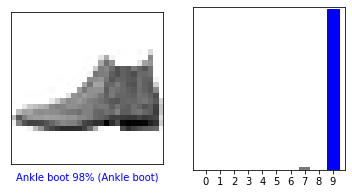

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

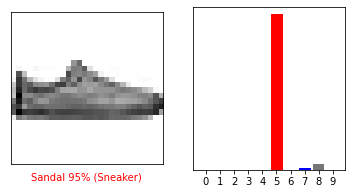

In [25]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们用模型的预测绘制几张图像。请注意，即使置信度很高，模型也可能出错。

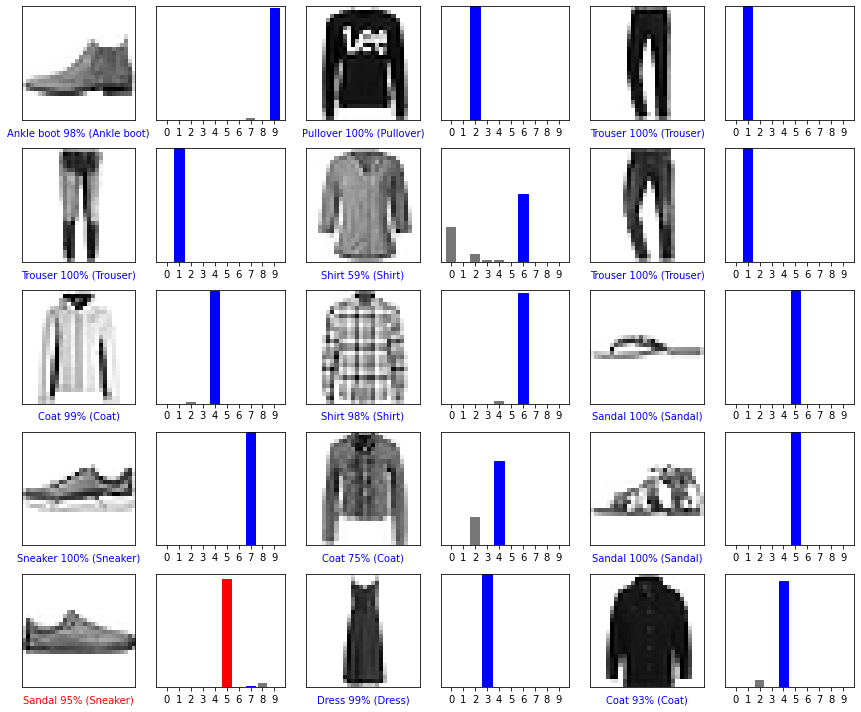

In [26]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用训练好的模型

最后，使用训练好的模型对单个图像进行预测。

In [27]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` 模型经过了优化，可同时对一个*批*或一组样本进行预测。因此，即便您只使用一个图像，您也需要将其添加到列表中：

In [28]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


现在预测这个图像的正确标签：

In [29]:
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 21ms/step


[[3.0789899e-05 4.1240561e-12 9.9947554e-01 1.6958888e-09 3.4095356e-04
  8.6128709e-14 1.5278466e-04 5.1959396e-17 5.5406429e-11 1.4665751e-13]]


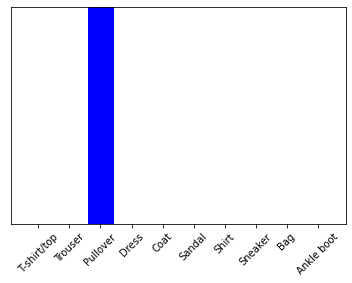

In [30]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` 会返回一组列表，每个列表对应一批数据中的每个图像。在批次中获取对我们（唯一）图像的预测：

In [31]:
np.argmax(predictions_single[0])

2

该模型会按照预期预测标签。